In [1]:
!pip show astropy

Name: astropy
Version: 7.0.1
Summary: Astronomy and astrophysics core library
Home-page: 
Author: 
Author-email: The Astropy Developers <astropy.team@gmail.com>
License: BSD-3-Clause
Location: C:\Users\btcya\Desktop\astronomy-course-programming\astrocourse\Lib\site-packages
Requires: astropy-iers-data, numpy, packaging, pyerfa, PyYAML
Required-by: 


In [2]:
# Import the package
import astropy

# Check the installed version
print(astropy.__version__)

7.0.1


['Name', 'RA', 'DEC', 'HST_WFC3_F225W', 'HST_WFC3_F275W', 'HST_WFC3_F336W', 'HST_WFC3_F475W', 'HST_WFC3_F814W', 'HST_WFC3_F110W', 'HST_WFC3_F160W', 'Av_Best', 'Av_Exp', 'Av_p16', 'Av_p50', 'Av_p84', 'Rv_Best', 'Rv_Exp', 'Rv_p16', 'Rv_p50', 'Rv_p84', 'Rv_A_Best', 'Rv_A_Exp', 'Rv_A_p16', 'Rv_A_p50', 'Rv_A_p84', 'f_A_Best', 'f_A_Exp', 'f_A_p16', 'f_A_p50', 'f_A_p84', 'distance_Best', 'distance_Exp', 'distance_p16', 'distance_p50', 'distance_p84', 'radius_Best', 'radius_Exp', 'radius_p16', 'radius_p50', 'radius_p84', 'logL_Best', 'logL_Exp', 'logL_p16', 'logL_p50', 'logL_p84', 'logg_Best', 'logg_Exp', 'logg_p16', 'logg_p50', 'logg_p84', 'mbolmag_Best', 'mbolmag_Exp', 'mbolmag_p16', 'mbolmag_p50', 'mbolmag_p84', 'logA_Best', 'logA_Exp', 'logA_p16', 'logA_p50', 'logA_p84', 'logT_Best', 'logT_Exp', 'logT_p16', 'logT_p50', 'logT_p84', 'M_ini_Best', 'M_ini_Exp', 'M_ini_p16', 'M_ini_p50', 'M_ini_p84', 'M_act_Best', 'M_act_Exp', 'M_act_p16', 'M_act_p50', 'M_act_p84', 'Z_Best', 'Z_Exp', 'Z_p16', '

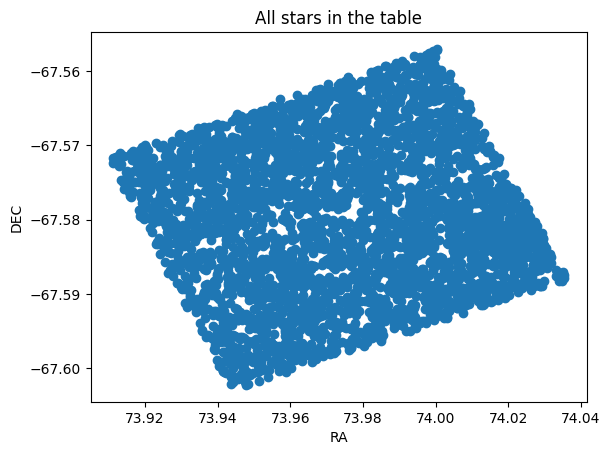

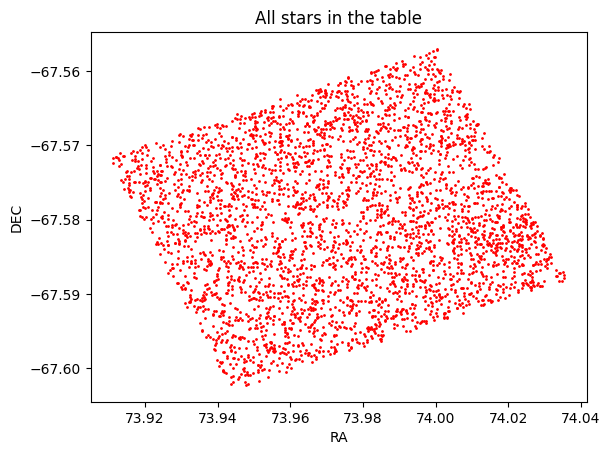

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table
from astropy.visualization import make_lupton_rgb
plt.ion()

hdul = fits.open('hst_results_nd.fits')


hdr = hdul[0].header
wcs = WCS(hdr)
data = hdul[0].data

t = Table.read('hst_results_nd.fits')

# check all stars in the table which are the first row of the table
ra = t[0]['RA']
dec = t[0]['DEC']
columns = t[0].colnames
print(columns)

# plot the table of all stars
plt.figure()
plt.plot(t['RA'], t['DEC'], 'o')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('All stars in the table')
plt.show()

# plot the start with smaller red spots so that they can be distinguished
plt.figure()
plt.plot(t['RA'], t['DEC'], 'ro', ls= 'None', markersize = 1)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('All stars in the table')
plt.show()



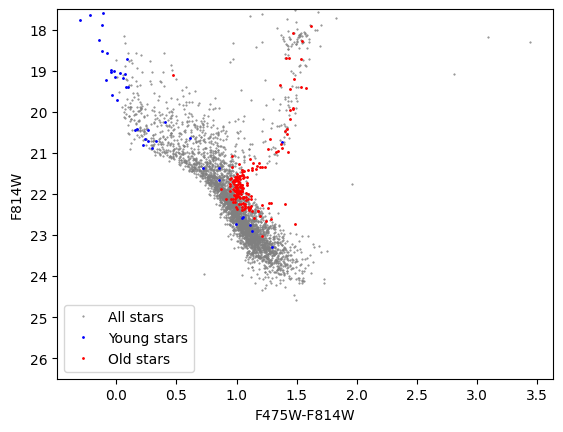

<Figure size 640x480 with 0 Axes>

In [19]:
age = t['logA_p50']
mass = t['M_ini_p50']
f475w = t['F475W_VEGA']
f814w = t['F814W_VEGA']

young_stars = t[age < 8.5]
old_stars = t[age > 10]

plt.figure()
plt.plot(f475w-f814w, f814w, '.', markersize = 1, label='All stars', color='gray',)
plt.ylim(26.5,17.5)
plt.plot(young_stars['F475W_VEGA']-young_stars['F814W_VEGA'], young_stars['F814W_VEGA'], 'bo', markersize = 1, label='Young stars')
plt.plot(old_stars['F475W_VEGA']-old_stars['F814W_VEGA'], old_stars['F814W_VEGA'], 'ro', markersize = 1, label='Old stars')
plt.xlabel('F475W-F814W')
plt.ylabel('F814W')
plt.legend()
plt.show()
plt.savefig('CMD_by_age.png')